# INTRODUCE TO OPENCV

OpenCV-Python là một thư viện chứa các ràng buộc Python được thiết kế để giải quyết các vấn đề về thị giác máy tính.
OpenCV-Python sử dụng Numpy, một thư viện được tối ưu hóa cao cho các phép tính số với cú pháp kiểu MATLAB. Tất cả các cấu trúc mảng OpenCV được chuyển đổi sang và từ mảng Numpy. Điều này cũng giúp tích hợp với các thư viện khác sử dụng Numpy dễ dàng hơn chẳng hạn như SciPy và Matplotlib.

### BASIC OPERATIONS ON IMAGES

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import os
print( cv.__version__ )


4.7.0


In [56]:
img = cv.imread('1.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

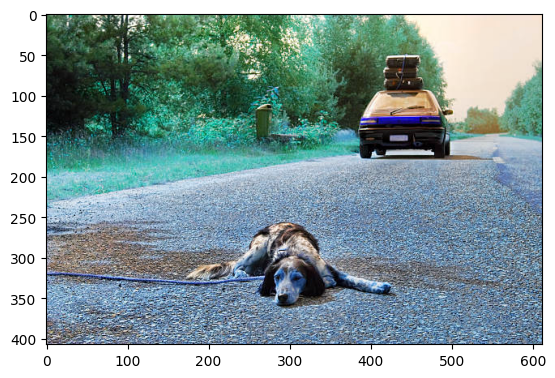

In [57]:
# cv.imshow('Image', img)
# cv.waitKey(1000)
plt.imshow(img)
plt.show()

In [46]:
px = img[100,100]
print(px)

[30 42 36]


In [47]:
#access blue pixel
blue = img[100,100,0]
print( blue )


30


In [49]:
img.shape

(407, 612, 3)

In [50]:
img.size

747252

In [51]:
img.dtype

dtype('uint8')

In [58]:
#copying to another region
dog = img[260:360, 180:430]
img[200:300, 350:600] = dog

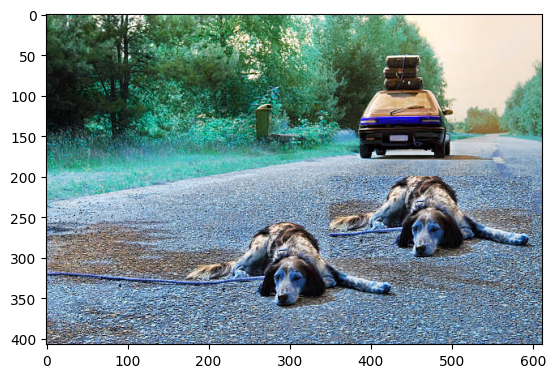

In [59]:
plt.imshow(img)
plt.show()

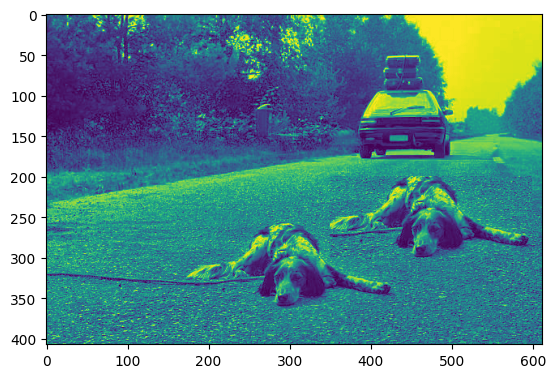

In [64]:
b,g,r = cv.split(img)
#b = img[:,:,0]
plt.imshow(b)
plt.show()
img = cv.merge((b,g,r))

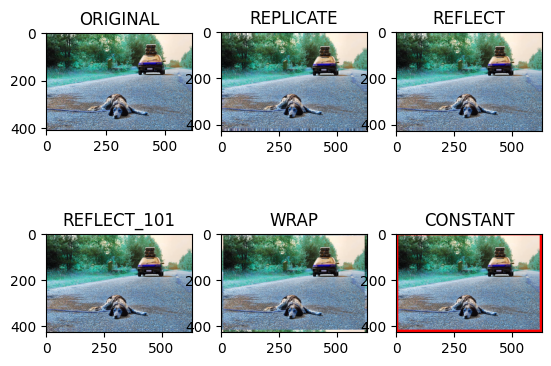

In [66]:
BLUE = [255,0,0]
img1 = cv.imread('1.jpg')
assert img1 is not None, "file could not be read, check with os.path.exists()"
replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

### ARITHMETIC OPERATIONS ON IMAGES

In [5]:
x = np.uint8([250])
y = np.uint8([10])
print( cv.add(x,y) ) # 250+10 = 260 => 255
print( x+y )          # 250+10 = 260 % 256 = 4

[[255]]
[4]


In [8]:
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 0C1B-A7C5

 Directory of C:\Users\LENOVO\Python\Intern

02/26/2024  11:31 AM    <DIR>          .
02/26/2024  10:30 AM    <DIR>          ..
02/26/2024  10:30 AM    <DIR>          .ipynb_checkpoints
01/21/2024  05:36 PM            90,490 1.jpg
02/26/2024  11:26 AM            91,541 OpenCV_logo.png
02/26/2024  11:29 AM         1,834,624 OpenCV_Practice.ipynb
02/26/2024  11:31 AM            23,165 OpenCV-01.jpg
               4 File(s)      2,039,820 bytes
               3 Dir(s)  220,348,096,512 bytes free


In [10]:
img1 = cv.imread('1.jpg')
img1.shape

(407, 612, 3)

In [21]:
img2 = cv.imread('OpenCV-01.jpg')
img2 = cv.resize(img2, (612, 407))
img2.shape

(407, 612, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

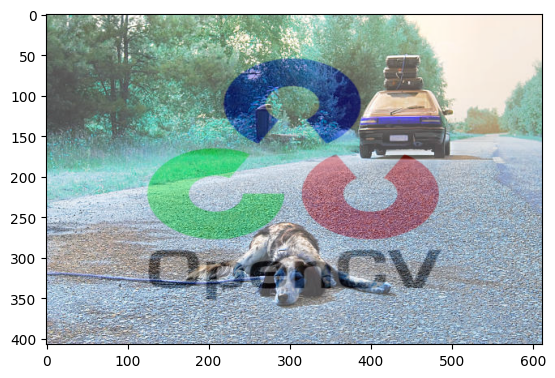

In [17]:
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
dst = cv.addWeighted(img1,0.7,img2,0.3,0)
# cv.imshow('dst',dst)
# cv.waitKey(0)
# cv.destroyAllWindows()
plt.imshow(dst)
plt.show

In [8]:
# Load two images
img1 = cv.imread('1.jpg')
img2 = cv.imread('OpenCV-01.jpg')
img2 = cv.resize(img2, (img1.shape[1], img1.shape[0]))
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
cv.imwrite('images/2.jpg', img2)

True

In [9]:
img2.shape

(407, 612, 3)

In [28]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

In [58]:
# Create a slide show of images in a folder with smooth transition between images using cv.addWeighted function
folder_path = 'C:/Users/LENOVO/Python/Intern/images'  # Replace with the actual folder path
image_files = os.listdir(folder_path)

image_files.sort()
cv.namedWindow('Slideshow', cv.WINDOW_NORMAL)
for i in range(len(image_files)):
    img1 = cv.imread(os.path.join(folder_path, image_files[i]))
    if i < len(image_files) - 1:
        img2 = cv.imread(os.path.join(folder_path, image_files[i+1]))
    else:
        img2 = cv.imread(os.path.join(folder_path, image_files[0]))

    alpha = 0  # Weight for img1
    while alpha <= 1:
        blended = cv.addWeighted(img1, alpha, img2, 1-alpha, 0)
        cv.imshow('Slideshow', blended)
        cv.waitKey(10)  # Adjust the delay between frames (in milliseconds)
        alpha += 0.01  # Adjust the blending speed

cv.destroyAllWindows()

### Performance Measurement and Improvement Techniques

In [13]:
img = cv.imread('1.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
# cv.setUseOptimized(False)
# cv.useOptimized()
e1 = cv.getTickCount()
for i in range(5,49,2):
    img = cv.medianBlur(img,i)
e2 = cv.getTickCount()
t = (e2 - e1)/cv.getTickFrequency()
print( t )

0.6812653


# Image Processing

### Changing Colorspace

Chương trình nhận diện màu vật thể xanh đọc từ camera

In [59]:
cap = cv.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    blue_lower = np.array([93, 79, 2], np.uint8)
    blue_upper = np.array([122,255,255], np.uint8)
    blueMask = cv.inRange(hsv, blue_lower, blue_upper)
    
    bit_blue = cv.bitwise_and(frame, frame, mask=blueMask)
    contours, hierachy = cv.findContours(blueMask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    for pic, contour in enumerate(contours):
        area = cv.contourArea(contour)
        if(area > 300):
            x, y , w, h = cv.boundingRect(contour)
            frame = cv.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
            
    cv.imshow('Nhan dien mau', frame)
    if cv.waitKey(10) & 0xFF == ord('q'):
        frame.release()
        cv.destroyAllWindows()
        break
        

AttributeError: 'numpy.ndarray' object has no attribute 'release'

Afine

In [59]:
img = cv.imread('1.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))

# M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
# dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

Thay đổi góc nhìn của ảnh

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'))

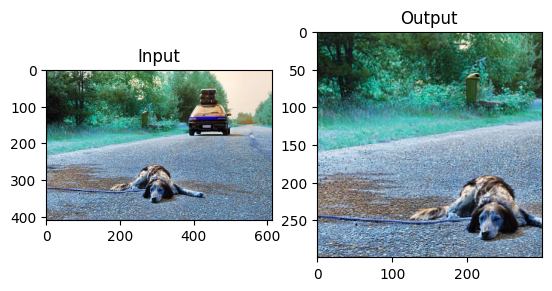

In [14]:
img = cv.imread('1.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = img.shape
# pts1 = np.float32([[50,50],[200,50],[50,200]])
# pts2 = np.float32([[10,100],[200,50],[100,250]])
# M = cv.getAffineTransform(pts1,pts2)
# dst = cv.warpAffine(img,M,(cols,rows))

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img, M, (300, 300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

Một số threshold

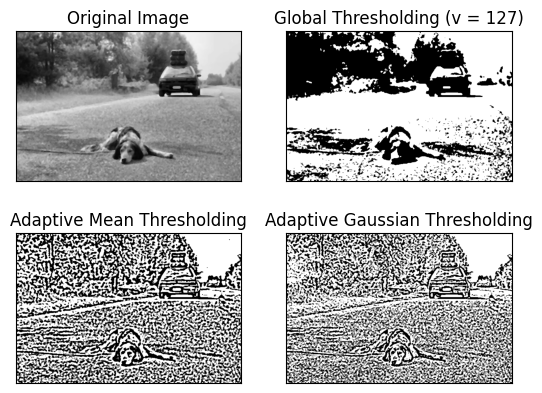

In [19]:
img = cv.imread('1.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Smoothing images

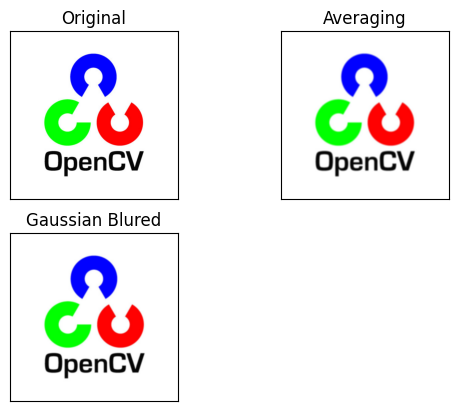

In [28]:
img = cv.imread('OpenCV-01.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
blur = cv.GaussianBlur(img,(5,5),0)
plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(blur),plt.title('Gaussian Blured')
plt.xticks([]), plt.yticks([])
plt.show()

(([], []), ([], []))

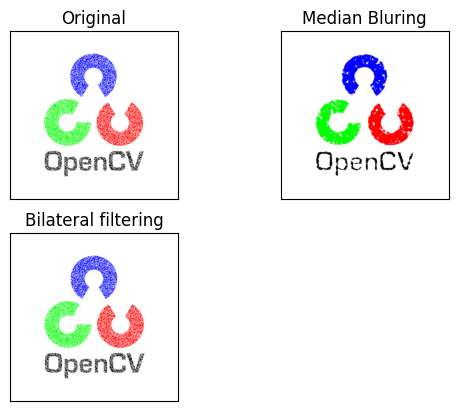

In [41]:
img = cv.imread('OpenCV-01.jpg')
height, width = img.shape[:2]
#add salt-and-pepper noise
num_salt = int(0.5 * height * width)
#random position
salt_coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape[:2]]
for x, y in zip(salt_coords[0], salt_coords[1]):
    img[x, y] = [255, 255, 255]  # Đặt giá trị pixel thành màu trắng
median = cv.medianBlur(img,7)
blur = cv.bilateralFilter(img,9,75,100)
plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(median),plt.title('Median Bluring')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(blur),plt.title('Bilateral filtering')
plt.xticks([]),plt.yticks([])

### Morphological Transformations

(([], []), ([], []))

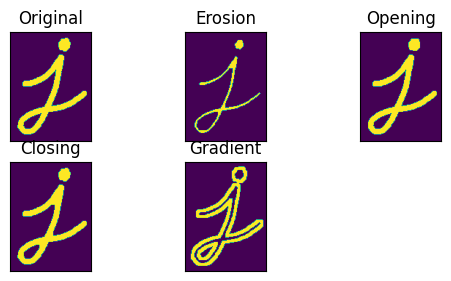

In [49]:
img = cv.imread('j.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1) #A pixel in the original image (either 1 or 0) will be considered 1 
                                                # only if all the pixels under the kernel is 1
dilation = cv.dilate(img,kernel,iterations = 1) # a pixel element is '1' if at least one pixel under the kernel is '1'
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
plt.subplot(331),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(erosion),plt.title('Erosion')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(opening),plt.title('Opening')
plt.xticks([]), plt.yticks([])
plt.subplot(334),plt.imshow(closing),plt.title('Closing')
plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(gradient),plt.title('Gradient')
plt.xticks([]), plt.yticks([])

### Image Gradients

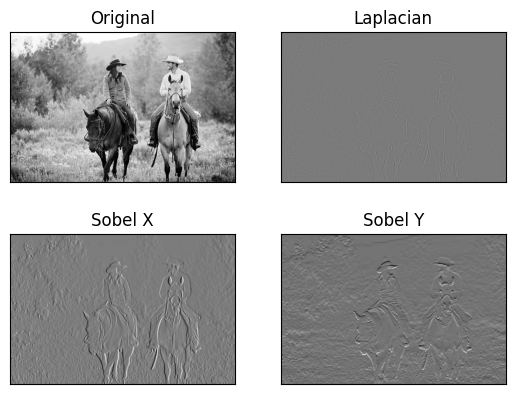

In [57]:
img = cv.imread('cowboy2.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

### Canny Edge Detection

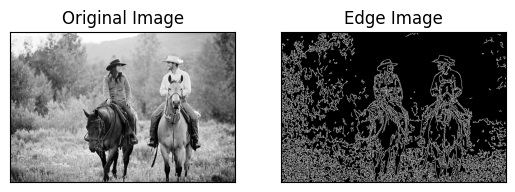

In [54]:
img = cv.imread('cowboy2.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Contours


Contours (Đường viền) có thể được giải thích đơn giản là một đường cong nối tất cả các điểm liên tục (dọc theo đường biên), có cùng màu sắc hoặc cường độ. Các đường viền là một công cụ hữu ích để phân tích hình dạng và phát hiện và nhận dạng đối tượng.
Trước khi tìm đường viền, hãy áp dụng tính năng phát hiện ngưỡng (threshold) hoặc cạnh canny.

Convert to gray => threshhold => findContours: danh sách các contour dạng mảng (x,y)

In [3]:
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 0C1B-A7C5

 Directory of C:\Users\LENOVO\Python\Intern

02/29/2024  09:04 AM    <DIR>          .
02/26/2024  10:30 AM    <DIR>          ..
02/26/2024  10:30 AM    <DIR>          .ipynb_checkpoints
01/21/2024  05:36 PM            90,490 1.jpg
01/21/2024  05:27 PM            67,709 cowboy2.jpg
02/26/2024  01:11 PM    <DIR>          images
02/26/2024  04:27 PM             1,126 j.png
02/26/2024  11:26 AM            91,541 OpenCV_logo.png
02/29/2024  09:04 AM         3,583,033 OpenCV_Practice.ipynb
02/26/2024  11:31 AM            23,165 OpenCV-01.jpg
               6 File(s)      3,857,064 bytes
               4 Dir(s)  219,431,993,344 bytes free


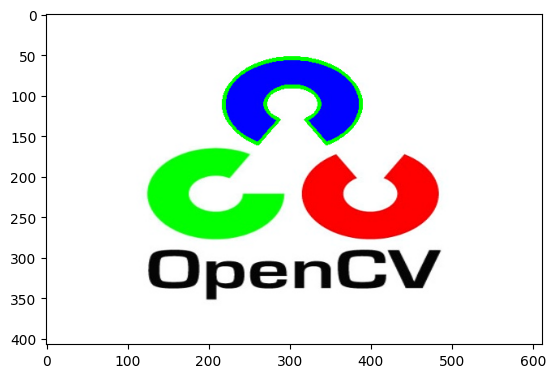

In [41]:
#find contour
im = cv.imread('images/2.jpg')
assert im is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
#cv.CHAIN_APPROX_SIMPLE: removes all redundant points and compresses the contour, thereby saving memory.
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
#draw contour
cnt = contours[11]
img = cv.drawContours(im, [cnt], 0, (0,255,0), 3)
plt.imshow(img)
plt.show()

Moments:  tính toán một số đặc điểm như tâm khối của vật thể, diện tích của vật thể, v.v.

In [42]:
img = cv.imread('images/2.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh = cv.threshold(img,127,255,0)
contours,hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = contours[11]
cnt
M = cv.moments(cnt)
print( M )

{'m00': 10592.5, 'm10': 3214404.333333333, 'm01': 1086264.1666666665, 'm20': 1000863053.9166666, 'm11': 329636370.125, 'm02': 118865171.41666666, 'm30': 319150163073.2, 'm21': 102809038287.03333, 'm12': 36070461263.23333, 'm03': 13749027649.85, 'mu20': 25418615.101268172, 'mu11': -1793.1488309502602, 'mu02': 7468443.563560456, 'mu30': 769573.9634399414, 'mu21': 171309384.55537176, 'mu12': -43944.93297338486, 'mu03': 27584966.597517014, 'nu20': 0.22654523897379236, 'nu11': -1.598156818555137e-05, 'nu02': 0.06656304150042665, 'nu30': 6.664294557483427e-05, 'nu21': 0.01483491195615658, 'nu12': -3.8055078726212394e-06, 'nu03': 0.0023887806955223403}


In [44]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx, cy)

303 102


In [45]:
#contour area
area = cv.contourArea(cnt)
print(area)
#contour perimeter
perimeter = cv.arcLength(cnt,True)


10592.5


In [28]:
#contour approximation:  approximates a contour shape to another shape with less number of vertices depending upon the precision we specify
epsilon = 0.1*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)

Bounding rectangle: 
- Staright bounding rectangle: a straight rectangle, it doesn't consider the rotation of the object
- Rotated rectangle: bounding rectangle is drawn with minimum area, so it considers the rotation also ( center (x,y), (width, height), angle of rotation )

<function matplotlib.pyplot.show(close=None, block=None)>

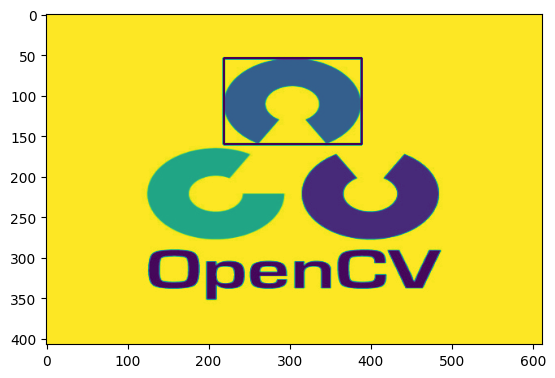

In [50]:
#straight bouding rectangle
img = cv.imread('images/2.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh = cv.threshold(img,127,255,cv.THRESH_BINARY)
contours,hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = contours[11]
#print(cnt)
x,y,w,h = cv.boundingRect(cnt)
img1 = cv.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
plt.imshow(img1)
plt.show


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_43572\3496674716.py:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


<function matplotlib.pyplot.show(close=None, block=None)>

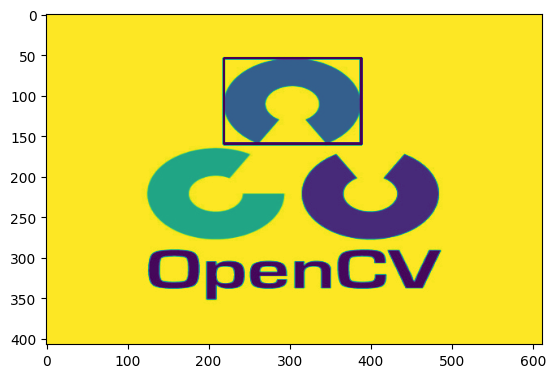

In [51]:
#Rotate rectangle
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
img1 = cv.drawContours(img1,[box],0,(0,0,255),2)
plt.imshow(img1)
plt.show

Extra: 
- Minimum enclosing circle
- Ellipse
- Line

<function matplotlib.pyplot.show(close=None, block=None)>

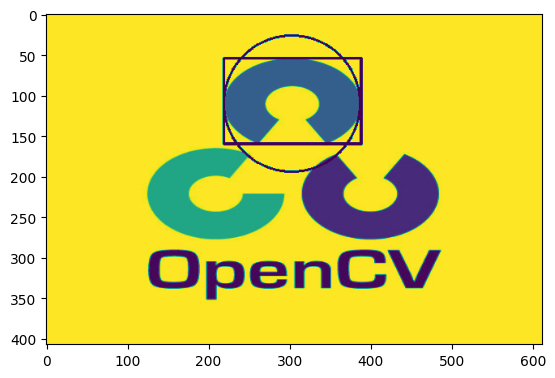

In [52]:
(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img2 = cv.circle(img,center,radius,(0,255,0),2)
plt.imshow(img2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

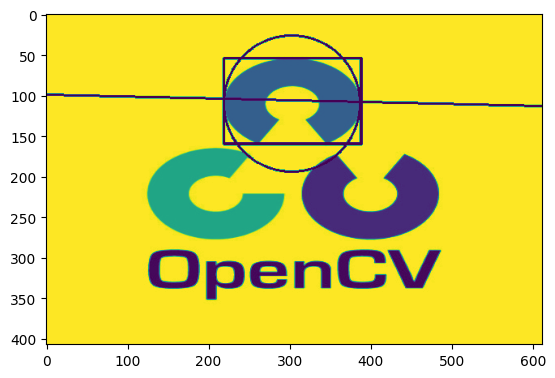

In [53]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv.fitLine(cnt, cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)
plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

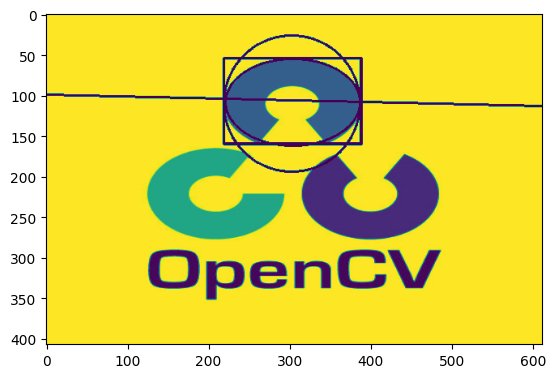

In [54]:
ellipse = cv.fitEllipse(cnt)
img = cv.ellipse(img,ellipse,(0,255,0),2)
plt.imshow(img)
plt.show

Properties:
- Aspect ratio: width/height
- Extent: object area/bounding rectangle area
- Solidity: contour area/convex hull area
- Equivalent Diameter: đường kính hình tròn có diện tích bằng diện tích đường viền. 
- Orientation: góc mà vật thể hướng vào, lấy ra từ fitEllipse()
- Mask and Pixel Points
- Maximum Value, Minimum Value and their locations: dùng mask image

In [55]:
#aspect ratio
x,y,w,h = cv.boundingRect(cnt)
aspect_ratio = float(w)/h
print(aspect_ratio)
#extent
area = cv.contourArea(cnt)
x,y,w,h = cv.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
print(extent)
#solidity
area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area)/hull_area
print(solidity)
#Equivalent Diameter
area = cv.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
print(equi_diameter)
#Orientation
(x,y),(MA,ma),angle = cv.fitEllipse(cnt)
print(angle)
#Mask and Pixel Points
mask = np.zeros(imgray.shape,np.uint8)
cv.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
print(pixelpoints)
#pixelpoints = cv.findNonZero(mask)
#Maximum Value, Minimum Value and their locations
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(imgray,mask = mask)

1.6037735849056605
0.587819089900111
0.7240507194367545
116.13263915716034
90.07740783691406
[[ 54 293]
 [ 54 294]
 [ 54 295]
 ...
 [159 345]
 [159 346]
 [159 347]]


Một số func khác:
- Convexity Defects(Khuyết tật lồi): Bất kỳ sai lệch nào của vật thể so với bao đều có thể được coi là khuyết tật lồi. Sử dụng cv.convexityDefects() để tìm ra khuyết tật lồi. Giá trị trả về là 1 mảng với từng hàng gồm có: [điểm bắt đầu, điểm kết thúc, điểm xa nhất, khoảng cách gần đúng đến điểm xa nhất].  

<function matplotlib.pyplot.show(close=None, block=None)>

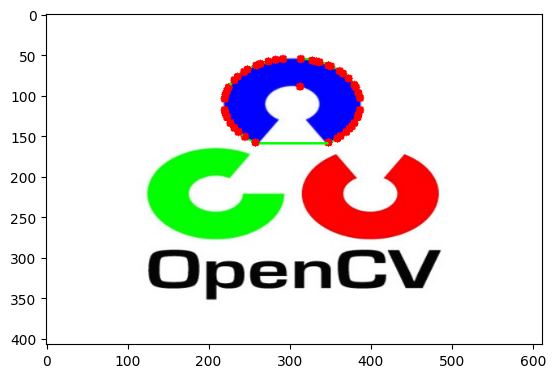

In [58]:
img = cv.imread('images/2.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt = contours[11]
#Sử dụng func convexityDefects
hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)
# 3 giá trị đầu tiên trả về là chỉ số của cnt nên ta phải đưa các giá trị đó từ cnt.
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv.line(img,start,end,[0,255,0],2) # đường bao vật thể 
    cv.circle(img,far,5,[255,0,0],-1) # các khuyết tật lồi
plt.imshow(img)
plt.show

- Point Polygon Test(Đa giác điểm):Hàm này tìm khoảng cách ngắn nhất giữa một điểm trong ảnh và một đường viền. Nó trả về khoảng cách âm khi điểm nằm ngoài đường viền, dương khi điểm nằm bên trong và bằng 0 nếu điểm nằm trên đường viền.

In [64]:
dist = cv.pointPolygonTest(cnt,(50,50),True)
dist

-177.2004514666935

- Match Shapes (So sánh hình): cho phép chúng ta so sánh hai hình dạng hoặc hai đường viền và trả về một số liệu thể hiện sự giống nhau. Kết quả càng thấp thì kết quả càng phù hợp. Kết quả này được tính toán dựa trên các giá trị hu-moments. Sử dụng func cv.matchShapes(contour1, contour2, comparison method, parameter thường 0)

Thông số hierarchy trong cv.findContours(): 
Đôi khi các đối tượng ở các vị trí khác nhau. Nhưng trong một số trường hợp, một số hình dạng nằm bên trong các hình dạng khác. Giống như các hình lồng nhau. Trong trường hợp này, ta gọi hình bên ngoài là cha và hình bên trong là con. Bằng cách này, các đường viền trong hình ảnh có một số mối quan hệ Và chúng ta có thể chỉ định cách một đường viền được kết nối với nhau, chẳng hạn như nó là con của một số đường viền khác hay là đường viền cha mẹ, v.v. Biểu diễn của mối quan hệ này được gọi là hierarchy.

Một số truy xuất contour liên quan đến hierarchy:
- RETR_LIST:  đơn giản lấy ra tất cả các đường viền, nhưng không tạo ra bất kỳ mối quan hệ cha-con nào. Cha mẹ và con cái đều bình đẳng theo quy tắc này và chúng chỉ là các đường viền
- RETR_EXTERNAL: Chỉ lấy các contour lớn nhất, các fdduwognf viền con bị bỏ qua.
- RETR_CCOMP: lấy tất cả các đường viền và sắp xếp chúng theo cấp bậc 2. Tức là các đường viền bên ngoài của đối tượng (tức là ranh giới của nó) được đặt trong cấp bậc-1. Và các đường viền của các lỗ bên trong đối tượng (nếu có) được đặt trong cấp bậc-2.
- RETR_TREE: Phân cấp đầy đủ cấp bậc của contour.

### Template Matching
Là phương pháp tìm kiếm và tìm vị trí của một hình ảnh mẫu trong một hình ảnh lớn hơn. Sử dụng func cv.matchTemplate() cho mục đích này. Nó chỉ đơn giản là trượt hình ảnh mẫu lên trên hình ảnh đầu vào (như trong tích chập 2D) và so sánh mẫu và bản vá của hình ảnh đầu vào dưới hình ảnh mẫu.

Nếu hình ảnh đầu vào có kích thước (WxH) và hình ảnh mẫu có kích thước (wxh), hình ảnh đầu ra sẽ có kích thước (W-w+1, H-h+1). Sau khi có kết quả,  sử dụng cv.minMaxLoc() để tìm giá trị lớn nhất/nhỏ nhất ở đâu. Lấy nó làm góc trên bên trái của hình chữ nhật và lấy (w,h) làm chiều rộng và chiều cao của hình chữ nhật. Hình chữ nhật đó là vùng mẫu của bạn.


In [ ]:
#VD minh họa
# img_rgb = cv.imread('img/path')
# assert img_rgb is not None, "file could not be read, check with os.path.exists()"
# img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
# template = cv.imread('img/detail/path', cv.IMREAD_GRAYSCALE)
# assert template is not None, "file could not be read, check with os.path.exists()"
# w, h = template.shape[::-1]
# res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
# threshold = 0.8
# loc = np.where( res >= threshold)
# for pt in zip(*loc[::-1]):
#     cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
# cv.imwrite('res.png',img_rgb)

### Hough Line, Hough Circle Transform
Hough Transform là một kỹ thuật phổ biến để phát hiện bất kỳ hình dạng nào, nếu bạn có thể biểu diễn hình dạng đó dưới dạng toán học, nó có thể phát hiện hình dạng ngay cả khi nó bị hỏng hoặc bị biến dạng một chút.

Trong OpenCV, đường thẳng được biểu diễn dưới dạng: ρ=xcosθ+ysinθ trong đó ρ là khoảng cách vuông góc từ gốc đến đường thẳng và θ là góc tạo bởi đường vuông góc này và trục ngang được đo ngược chiều kim đồng hồ. ρ >0 nếu nằm dưới gốc, <0 nếu ngược lại; θ<180.

(ρ,θ) => tạo 2D array, hàng biểu thị ρ và cột biểu thị θ với số lượng phụ thuộc độ chính xác cần thiết => VỚi mỗi cặp (ρ,θ) tăng giá trị các ô (ρ,θ) tương ứng 1 đơn vị => Lấy và thực hiện tương tự với điểm thứ 2 => Lấy giá trị của ô có giá trị lớn nhất.
### Probabilistic Hough Transform
Là thuật toán tối ưu của thuật toán gốc, trong đó nó không xem xét tất cả các điểm mà chỉ lấy một tập hợp con ngẫu nhiên các điểm đủ để phát hiện dòng, sau đó chỉ cần giảm ngưỡng. Nó bổ sung thêm 2 giá trị: 
- minLineLength - Độ dài tối thiểu của dòng. Các đoạn dòng ngắn hơn sẽ bị từ chối.
- maxLineGap - Khoảng cách tối đa được phép giữa các đoạn đường để coi chúng là một đường đơn.


<function matplotlib.pyplot.show(close=None, block=None)>

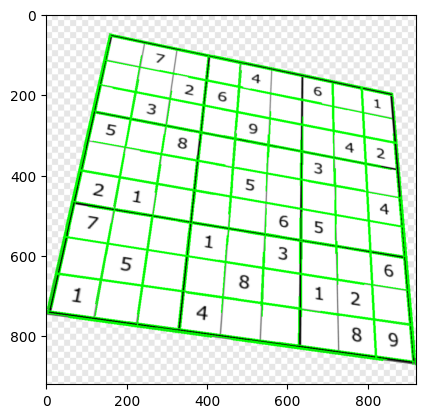

In [66]:
img = cv.imread('images/sudoku.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
# lines = cv.HoughLines(edges,1,np.pi/180,200) #(img, rho, theta, thresh)
# for line in lines:
#     rho,theta = line[0]
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000*(-b))
#     y1 = int(y0 + 1000*(a))
#     x2 = int(x0 - 1000*(-b))
#     y2 = int(y0 - 1000*(a))
#     cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)
lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv.imwrite('images/houghlines3.jpg',img)
plt.imshow(img)
plt.show

Đối với đường tròn: Cần 3 giá trị (x_center, y_center) và r => cần 3D array => Dùng Hough gradient cho Hough transform. (cv.HoughCircles())



<function matplotlib.pyplot.show(close=None, block=None)>

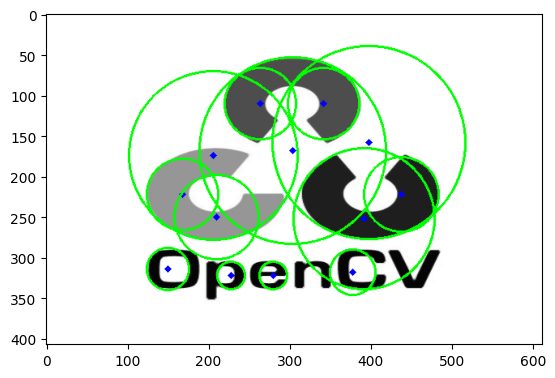

In [69]:
img = cv.imread('images/2.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,50,
                            param1=50,param2=30,minRadius=0,maxRadius=0) 
        # (img, method, dp: độ phân giải, minDist: k/c tối thiểu giữa tâm các đường tròn, param1, param2, minRadius, maxRadius)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
plt.imshow(cimg)
plt.show

### Image segmentation sử dụng watershed algorithm
Bất kỳ hình ảnh thang độ xám nào cũng có thể được xem dưới dạng bề mặt địa hình, trong đó cường độ cao biểu thị các đỉnh và đồi trong khi cường độ thấp biểu thị các thung lũng. 

Lấp đầy mọi thung lũng biệt lập (cực tiểu cục bộ) bằng các nước có màu khác nhau (label). Khi nước dâng lên, tùy thuộc vào các đỉnh (độ dốc) gần đó, nước từ các thung lũng khác nhau, rõ ràng với các màu sắc khác nhau sẽ bắt đầu hợp nhất => xây dựng rào chắn ở những vị trí nước hòa vào đến khi tất cả các đỉnh đều chìm trong nước => kết quả phân khúc.

OpenCV đã triển khai thuật toán lưu vực dựa trên điểm đánh dấu, trong đó bạn chỉ định tất cả các điểm thung lũng sẽ được hợp nhất và điểm nào không: 
- Đặt các nhãn khác nhau cho đối tượng đã biết. 
- Dán nhãn cho khu vực đó chúng tôi chắc chắn là tiền cảnh hoặc đối tượng có một màu (hoặc cường độ), gắn nhãn vùng chắc chắn là nền hoặc không phải đối tượng bằng một màu khác.
- Vùng mà không chắc chắn về bất kỳ điều gì => nhãn 0 . 
- Khi thực hiện thuật toán, điểm đánh dấu sẽ được cập nhật với các nhãn mà mình đã đưa ra và ranh giới của các đối tượng sẽ có giá trị -1.




In [4]:
img = cv.imread('images/water_coins.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

Các phương pháp:
- Khử nhiễu trắng nhỏ: Có thể dùng morphological opening hoặc closing.
- Phát hiện vùng chắc chắn là vật thể: Các vật thể không dính nhau => dùng erosion.
- Phát hiện vùng chắc chắn là vật thể: Các vật thể dính nhau => dùng distance transform + threshold phù hợp.
- Vùng chắc chắn không phải vật thể: dùng dilate (giãn nở)

Biên giới có thể tìm bằng cách trừ đi vùng chắc chắn foreground từ vùng chắc chắn background. 

In [5]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

Tạo marker: array cùng kthuoc ảnh gốc, vùng chắc chắn được đánh nhãn với số nguyên dương khác nhau, vùng khoogn chắc chắn đánh 0 (Sử dụng connectedComponents()) 

In [6]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

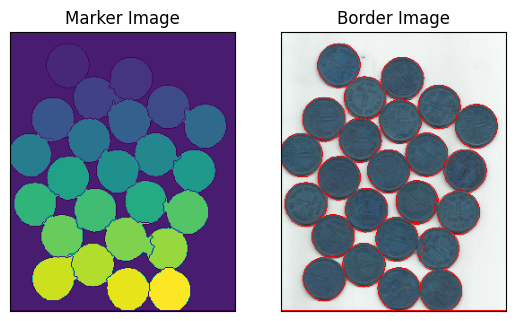

In [9]:
#Apply watershed algorithm
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.subplot(121),plt.imshow(markers)
plt.title('Marker Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img)
plt.title('Border Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Image Denoising
- cv.fastNlMeansDenoising() - hoạt động với một hình ảnh thang độ xám.
- cv.fastNlMeansDenoisingColored() - hoạt động với hình ảnh màu.
- cv.fastNlMeansDenoisingMulti() - hoạt động với chuỗi hình ảnh được chụp trong khoảng thời gian ngắn (hình ảnh thang độ xám).
- cv.fastNlMeansDenoisingColoredMulti() - tương tự như trên, nhưng dành cho hình ảnh màu.

Các tham số phổ biến trong func:
- h : tham số quyết định cường độ bộ lọc. Giá trị h cao hơn sẽ loại bỏ nhiễu tốt hơn nhưng cũng loại bỏ các chi tiết của hình ảnh. (khuyến nghị 10)
- hForColorComponents : giống như h, nhưng chỉ dành cho ảnh màu (thông thường giống như h)
- templateWindowSize : nên là số lẻ (khuyến nghị 7)
- searchWindowSize : nên là số lẻ (khuyến nghị 21)

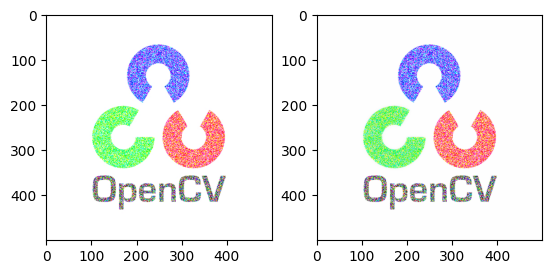

In [13]:
img = cv.imread('images/OpenCV-01.jpg')
# Tạo một ma trận noise có kích thước giống ảnh và giá trị ngẫu nhiên tuân theo phân phối Gaussian
noise = np.random.normal(0, 25, img.shape).astype(np.uint8)
img = cv.add(img, noise)

#Apply  denoising
dst = cv.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()
    

### Image inpainting
Phục dựng ảnh bằng 2 phương pháp tương đương với 2 đối số trong func cv.inpaint():
- cv.INPAINT_TELEA: dựa trên thuật toán Fast Marching Method: chọn giá trị weight cho chuẩn hóa tổng các pixel láng giềng để lấy giá trị cho pixel cần phục dựng => chuyển sang pixel tiếp theo bằng FMM.
- cv.INPAINT_NS: dựa vào động lực chất lỏng, di chuyển dọc các cạnh giữa các vùng, khớp các vecto gradient ở các vùng cần phục dựng => màu được tô để giảm phương sai tối thiểu.

dst = cv.inpaint(img,mask,3,cv.INPAINT_TELEA) #(img, mask, inpaintRadius: Bán kính của vùng lân cận hình tròn, flags) 


# Feature Detection and Description
### Understanding features